**Network intrusion detection**

In [97]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [98]:
train_df = pd.read_csv('Train_data.csv')
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


checking for null  values

In [99]:
train_df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [100]:
train_df.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,24330.628215,3491.847174,0.000079,0.023738,0.000040,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.000000,0.000000,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2410805.402028,88830.718330,0.008910,0.260221,0.006300,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.000000,0.000000,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,279.000000,530.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,381709090.000000,5151385.000000,1.000000,3.000000,1.000000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.000000,0.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


checking for duplicated

In [101]:
train_df.duplicated().sum()

0

In [102]:
train_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [103]:
print(train_df['protocol_type'].unique(),'\n')
print(train_df['service'].unique(), '\n')
print(train_df['flag'].unique(),'\n')
print(train_df['class'].unique(),'\n')

['tcp' 'udp' 'icmp'] 

['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001'] 

['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'] 

['normal' 'anomaly'] 



In [104]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


Encoding categorical values to numerical values

In [105]:
from  sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder

In [106]:
label_col = ['service','flag','class']
lb_encoder = LabelEncoder()
oh_encoder = OneHotEncoder()

for col in  label_col:
    train_df[col] = lb_encoder.fit_transform(train_df[col])

train_df = pd.get_dummies(train_df , columns=['protocol_type']).astype(int)

In [107]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   duration                     25192 non-null  int32
 1   service                      25192 non-null  int32
 2   flag                         25192 non-null  int32
 3   src_bytes                    25192 non-null  int32
 4   dst_bytes                    25192 non-null  int32
 5   land                         25192 non-null  int32
 6   wrong_fragment               25192 non-null  int32
 7   urgent                       25192 non-null  int32
 8   hot                          25192 non-null  int32
 9   num_failed_logins            25192 non-null  int32
 10  logged_in                    25192 non-null  int32
 11  num_compromised              25192 non-null  int32
 12  root_shell                   25192 non-null  int32
 13  su_attempted                 25192 non-null  i

Checking distribution  of the output column

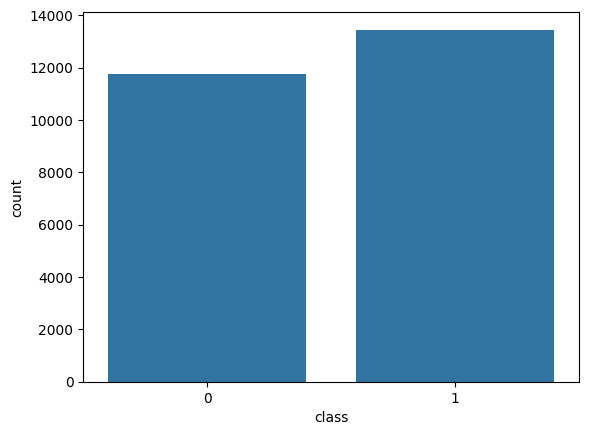

In [108]:
sns.countplot(x = train_df['class'] , data = train_df)
plt.show()

making X and y  for training

In [125]:
X = train_df.drop(labels='class',axis=1)
y = train_df['class']

In [141]:
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from keras.layers import Dense ,Dropout ,BatchNormalization, Activation
from keras. optimizers import Adam
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.regularizers import l2

In [127]:
X_train , X_test ,y_train ,y_test = train_test_split(X,y ,
                                                     test_size=0.8,
                                                     random_state=42)

print('Training data',X_train.shape)
print('Testing data',X_test.shape)
print('Train class',y_train.shape)
print('Test class',y_test.shape)

Training data (5038, 43)
Testing data (20154, 43)
Train class (5038,)
Test class (20154,)


Building model

In [131]:

input_shape = (len(X_train.columns),)

model = Sequential([
    Dense(128, input_shape=input_shape),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dropout(0.25),
    Dense(1,),
    Activation('sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 128)               5632      
                                                                 
 activation_61 (Activation)  (None, 128)               0         
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 activation_62 (Activation)  (None, 64)                0         
                                                                 
 dense_78 (Dense)            (None, 64)                4160      
                                                                 
 activation_63 (Activation)  (None, 64)                0         
                                                                 
 dense_79 (Dense)            (None, 64)              

In [132]:
history = model.fit(X_train ,y_train ,
                    batch_size= 32 ,
                    epochs= 30 ,
                    validation_data=(X_test ,y_test),
                                     callbacks=[EarlyStopping(patience=3)])

Epoch 1/30
158/158 [==============================] - 10s 56ms/step - loss: 22.7193 - accuracy: 0.8851 - val_loss: 867.0596 - val_accuracy: 0.9135
Epoch 2/30
158/158 [==============================] - 9s 56ms/step - loss: 24.6728 - accuracy: 0.9133 - val_loss: 1023.2141 - val_accuracy: 0.9467
Epoch 3/30
158/158 [==============================] - 9s 57ms/step - loss: 25.5470 - accuracy: 0.9381 - val_loss: 1480.3998 - val_accuracy: 0.9489
Epoch 4/30
158/158 [==============================] - 7s 46ms/step - loss: 11.1817 - accuracy: 0.9313 - val_loss: 409.8999 - val_accuracy: 0.9548
Epoch 5/30
158/158 [==============================] - 6s 35ms/step - loss: 14.7360 - accuracy: 0.9428 - val_loss: 2051.9600 - val_accuracy: 0.9522
Epoch 6/30
158/158 [==============================] - 9s 55ms/step - loss: 8.4796 - accuracy: 0.9363 - val_loss: 209.2961 - val_accuracy: 0.9568
Epoch 7/30
158/158 [==============================] - 7s 42ms/step - loss: 2.7975 - accuracy: 0.9442 - val_loss: 400.8472

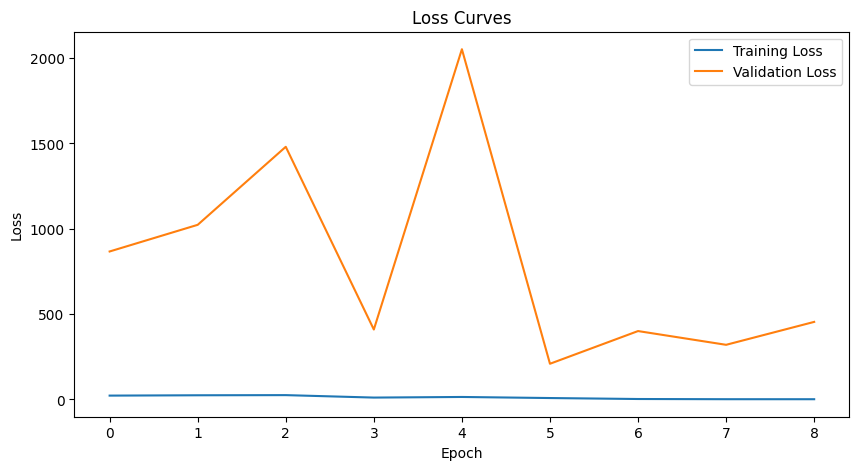

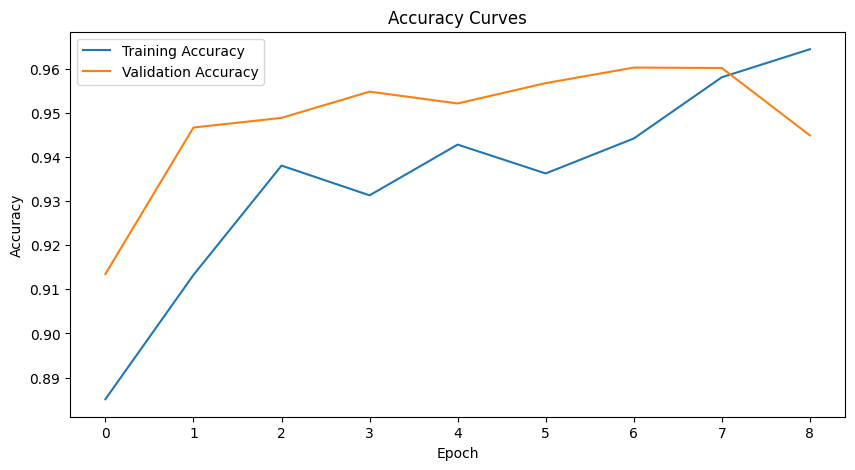

In [133]:
# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

# Plot the training and validation accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.show()

Evaluating the model

In [140]:
accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy[1]:.4f}')

630/630 [==============================] - 2s 3ms/step - loss: 454.5863 - accuracy: 0.9449
Test Accuracy: 0.9449


630/630 [==============================] - 1s 1ms/step


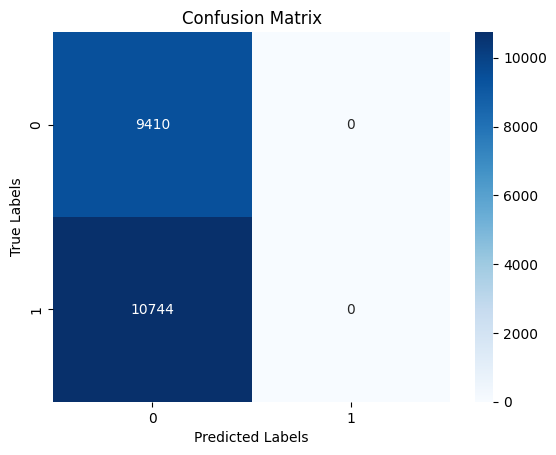

In [161]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
classes = np.unique(y_train)
# Plot the confusion matrix as a heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [134]:
test_df = pd.read_csv('Test_data.csv')
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [135]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

Encoding test object data to numerical 

In [137]:
label_col = ['service','flag']
for col in  label_col:
    test_df[col] = lb_encoder.fit_transform(test_df[col])

test_df = pd.get_dummies(test_df , columns=['protocol_type']).astype(int)

In [138]:
test_df = test_df.to_numpy()

In [139]:

predictions = model.predict(test_df)

705/705 [==============================] - 1s 2ms/step


In [158]:
test_y_pred = np.argmax(predictions ,axis =1)
print(y_pred)

[0 0 0 ... 0 0 0]
